# Melbourne housing marcket dataset

## Steps to be followed
1. Data collection
2. Importing libraries
3. Importing datasets
4. Preprocessing
5. Identifying and handling missing values
6. Visualization
7. Encoding categorical features to numerical
8. Splitting the data
9. Scaling
10. Model building
11. model performance

## 1. Dataset collected from team lead

## 2. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import re

## 3. Importing datasets

In [2]:
import pandas as pd
import zipfile

zf = zipfile.ZipFile('C:/Users/Reddymr2022/Lasso_Regression/Week-6-Task/Melbourne_Housing_Market_dataset.zip') # having First.csv zipped file.
data1 = pd.read_csv(zf.open('Melbourne_Housing_Market_dataset/MELBOURNE_HOUSE_PRICES_LESS.csv'))
data2 = pd.read_csv(zf.open('Melbourne_Housing_Market_dataset/Melbourne_housing_FULL.csv'))

In [3]:
print(data1.shape)
print(data2.shape)

(63023, 13)
(34857, 21)


## 4. Preprocessing

In [4]:
data1.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [5]:
data1.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63020,Roxburgh Park,5 Parkinson Wy,3,h,545000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63021,Thomastown,3/1 Travers St,3,u,NaN,PI,Barry,31/03/2018,3074,Northern Metropolitan,7955,15.3,Whittlesea City Council
63022,Williams Landing,1 Diadem Wy,4,h,NaN,SP,Aussie,31/03/2018,3027,Western Metropolitan,1999,17.6,Wyndham City Council


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


## 5. Identifying and handling missing values

In [7]:
data1.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

In [8]:
round(data1.isna().mean()*100,2)

Suburb            0.00
Address           0.00
Rooms             0.00
Type              0.00
Price            23.15
Method            0.00
SellerG           0.00
Date              0.00
Postcode          0.00
Regionname        0.00
Propertycount     0.00
Distance          0.00
CouncilArea       0.00
dtype: float64

In [9]:
data2.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [10]:
data2.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [11]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [12]:
data2.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [13]:
round(data2.isna().mean()*100,2)

Suburb            0.00
Address           0.00
Rooms             0.00
Type              0.00
Price            21.83
Method            0.00
SellerG           0.00
Date              0.00
Distance          0.00
Postcode          0.00
Bedroom2         23.57
Bathroom         23.60
Car              25.04
Landsize         33.88
BuildingArea     60.58
YearBuilt        55.39
CouncilArea       0.01
Lattitude        22.88
Longtitude       22.88
Regionname        0.01
Propertycount     0.01
dtype: float64

### We can drop 'YearBuilt' and 'BuildingArea' since these columns contains more than 50% null values

In [14]:
data2 = data2.drop(['YearBuilt','BuildingArea'],axis=1)

In [15]:
data2.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [16]:
print(data1.columns)
print(data2.columns)

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance',
       'CouncilArea'],
      dtype='object')
Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       'Propertycount'],
      dtype='object')


In [17]:
df = pd.merge(data1, data2)

In [18]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude
0,Abbotsford,256 Langridge St,3,h,1350000.0,S,Biggin,1/07/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,NaN,NaN,NaN,NaN,NaN,NaN
1,Airport West,16 Glenys Av,3,h,858000.0,SP,Raine,1/07/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,NaN,NaN,NaN,NaN,NaN,NaN
2,Airport West,1/9 Kitson Cr,2,u,593000.0,S,Nelson,1/07/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,NaN,NaN,NaN,NaN,NaN,NaN
3,Airport West,118 Marshall Rd,3,h,640000.0,S,Nelson,1/07/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,3.0,1.0,2.0,219.0,-37.71655,144.88155
4,Airport West,9 South Rd,3,h,961000.0,S,Nelson,1/07/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,3.0,1.0,2.0,717.0,-37.72274,144.88002


In [19]:
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price            4547
Method              0
SellerG             0
Date                0
Postcode            0
Regionname          0
Propertycount       0
Distance            0
CouncilArea         0
Bedroom2         5248
Bathroom         5257
Car              5759
Landsize         8825
Lattitude        5107
Longtitude       5107
dtype: int64

In [20]:
df.describe()

,Rooms,Price,Postcode,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude
count,21001.000000,1.645400e+04,21001.000000,21001.000000,21001.000000,15753.000000,15744.000000,15242.000000,12176.000000,15894.000000,15894.000000
mean,3.116661,1.033030e+06,3127.683777,7670.392696,12.824356,3.247889,1.686738,1.859336,701.120483,-37.809867,145.009723
std,0.948688,6.291752e+05,130.450559,4425.319124,7.831108,0.921396,0.720433,1.024867,4536.708357,0.106000,0.143120
min,1.000000,1.120000e+05,3000.000000,83.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-38.190430,144.423790
25%,3.000000,6.350000e+05,3056.000000,4387.000000,6.700000,3.000000,1.000000,1.000000,334.000000,-37.872595,144.929700
50%,3.000000,8.550000e+05,3106.000000,6795.000000,11.400000,3.000000,2.000000,2.000000,577.500000,-37.805585,145.019685
75%,4.000000,1.255000e+06,3163.000000,10529.000000,16.700000,4.000000,2.000000,2.000000,698.000000,-37.742445,145.096148
max,16.000000,1.120000e+07,3978.000000,21650.000000,48.100000,16.000000,9.000000,18.000000,433014.000000,-37.390200,145.526350


<AxesSubplot:xlabel='Price', ylabel='Density'>

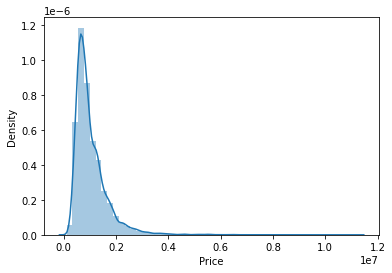

In [21]:
#checking the distribution
sns.distplot(df['Price'])

<AxesSubplot:xlabel='Rooms', ylabel='Density'>

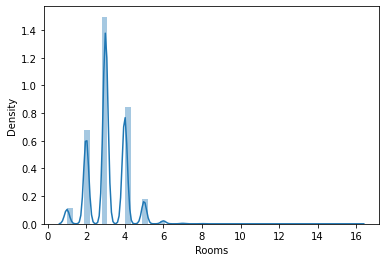

In [22]:
#checking the distribution
sns.distplot(df['Rooms'])

<AxesSubplot:xlabel='Postcode', ylabel='Density'>

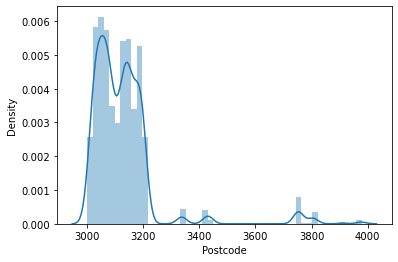

In [23]:
#checking the distribution
sns.distplot(df['Postcode'])

<AxesSubplot:xlabel='Bedroom2', ylabel='Density'>

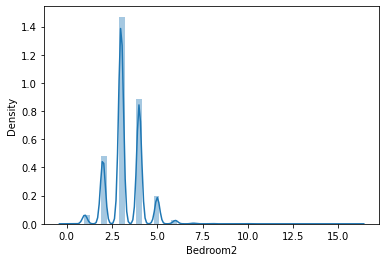

In [24]:
#checking the distribution
sns.distplot(df['Bedroom2'])

<AxesSubplot:xlabel='Propertycount', ylabel='Density'>

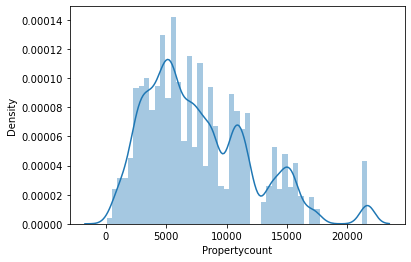

In [25]:
#checking the distribution
sns.distplot(df['Propertycount'])

<AxesSubplot:xlabel='Distance', ylabel='Density'>

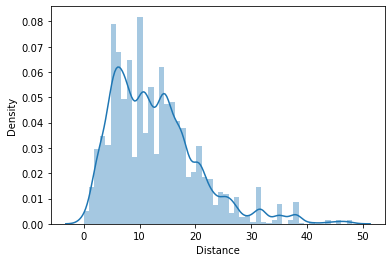

In [26]:
#checking the distribution
sns.distplot(df['Distance'])

<AxesSubplot:xlabel='Bathroom', ylabel='Density'>

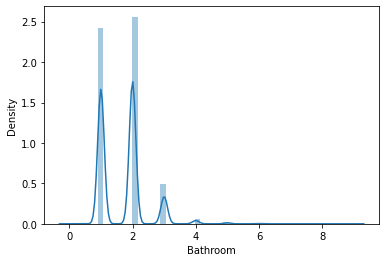

In [27]:
#checking the distribution
sns.distplot(df['Bathroom'])

<AxesSubplot:xlabel='Car', ylabel='Density'>

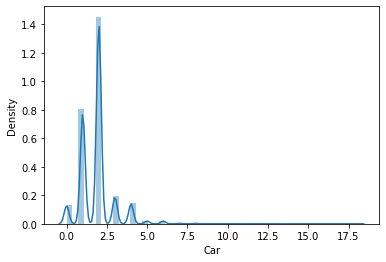

In [28]:
#checking the distribution
sns.distplot(df['Car'])

<AxesSubplot:xlabel='Landsize', ylabel='Density'>

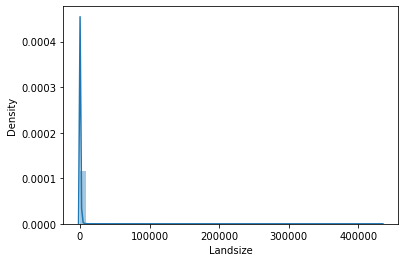

In [29]:
#checking the distribution
sns.distplot(df['Landsize'])

In [30]:
## calculating inter quantile range
Q3 = df.Price.quantile(0.75)
Q1 = df.Price.quantile(0.25)
IQR = Q3 - Q1
IQR

620000.0

In [31]:
#Outlier 
lower_bridge = df['Price'].quantile(0.25)-(IQR*1.5)
upper_bridge = df['Price'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-295000.0
2185000.0


In [32]:
data=df.copy()

In [33]:
# filling outlier with fixed value
data.loc[data['Price']>=2185000, 'Price']=2185000

In [34]:
## calculating inter quantile range
Q3 = df.Postcode.quantile(0.75)
Q1 = df.Postcode.quantile(0.25)
IQR = Q3 - Q1
IQR

107.0

In [35]:
#Outlier 
lower_bridge = df['Postcode'].quantile(0.25)-(IQR*1.5)
upper_bridge = df['Postcode'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

2895.5
3323.5


In [36]:
# filling outlier with fixed value
data.loc[data['Postcode']>=3323, 'Postcode']=3323

In [37]:
## calculating inter quantile range
Q3 = df.Rooms.quantile(0.75)
Q1 = df.Rooms.quantile(0.25)
IQR = Q3 - Q1
IQR

1.0

In [38]:
#Outlier 
lower_bridge = df['Rooms'].quantile(0.25)-(IQR*1.5)
upper_bridge = df['Rooms'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

1.5
5.5


In [39]:
# filling outlier with fixed value
data.loc[data['Rooms']>=6, 'Rooms']=6

In [40]:
## calculating inter quantile range
Q3 = df.Propertycount.quantile(0.75)
Q1 = df.Propertycount.quantile(0.25)
IQR = Q3 - Q1
IQR

6142.0

In [41]:
#Outlier 
lower_bridge = df['Propertycount'].quantile(0.25)-(IQR*1.5)
upper_bridge = df['Propertycount'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-4826.0
19742.0


In [42]:
# filling outlier with fixed value
data.loc[data['Propertycount']>=19742, 'Propertycount']=19742

In [43]:
## calculating inter quantile range
Q3 = df.Distance.quantile(0.75)
Q1 = df.Distance.quantile(0.25)
IQR = Q3 - Q1
IQR

10.0

In [44]:
#Outlier 
lower_bridge = df['Distance'].quantile(0.25)-(IQR*1.5)
upper_bridge = df['Distance'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-8.3
31.7


In [45]:
# filling outlier with fixed value
data.loc[data['Distance']>=32, 'Distance']=32

In [46]:
## calculating inter quantile range
Q3 = df.Bedroom2.quantile(0.75)
Q1 = df.Bedroom2.quantile(0.25)
IQR = Q3 - Q1
IQR

1.0

In [47]:
#Outlier 
lower_bridge = df['Bedroom2'].quantile(0.25)-(IQR*1.5)
upper_bridge = df['Bedroom2'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

1.5
5.5


In [48]:
# filling outlier with fixed value
data.loc[data['Bedroom2']>=6, 'Bedroom2']=6

In [49]:
## calculating inter quantile range
Q3 = df.Bathroom.quantile(0.75)
Q1 = df.Bathroom.quantile(0.25)
IQR = Q3 - Q1
IQR

1.0

In [50]:
#Outlier 
lower_bridge = df['Bathroom'].quantile(0.25)-(IQR*1.5)
upper_bridge = df['Bathroom'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-0.5
3.5


In [51]:
# filling outlier with fixed value
data.loc[data['Bathroom']>=4, 'Bathroom']=4

In [52]:
## calculating inter quantile range
Q3 = df.Car.quantile(0.75)
Q1 = df.Car.quantile(0.25)
IQR = Q3 - Q1
IQR

1.0

In [53]:
#Outlier 
lower_bridge = df['Car'].quantile(0.25)-(IQR*1.5)
upper_bridge = df['Car'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-0.5
3.5


In [54]:
# filling outlier with fixed value
data.loc[data['Car']>=4, 'Car']=4

In [55]:
## calculating inter quantile range
Q3 = df.Landsize.quantile(0.75)
Q1 = df.Landsize.quantile(0.25)
IQR = Q3 - Q1
IQR

364.0

In [56]:
#Outlier 
lower_bridge = df['Landsize'].quantile(0.25)-(IQR*1.5)
upper_bridge = df['Landsize'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-212.0
1244.0


In [57]:
# filling outlier with fixed value
data.loc[data['Landsize']>=1244, 'Landsize']=1244

categorical_data = df.select_dtypes(include=['object'])

numerical_data = df.select_dtypes(exclude=['object'])

#define function to treat outliers

def treat_outliers(column):
    # calculate the mean and standard deviation of the column
    mean = column.mean()
    std = column.std()
    # replace any values more than 3 standard deviations away from the mean with NaN
    column[(column < (mean - 3 * std)) | (column > (mean + 3 * std))] = None
    return column
    
#loop through each column of the DataFrame and treat outliers

for col in numerical_data.columns:
    numerical_data[col] = treat_outliers(numerical_data[col])

In [58]:
#data = pd.merge(numerical_data, categorical_data)

In [59]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude
0,Abbotsford,256 Langridge St,3,h,1350000.0,S,Biggin,1/07/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,NaN,NaN,NaN,NaN,NaN,NaN
1,Airport West,16 Glenys Av,3,h,858000.0,SP,Raine,1/07/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,NaN,NaN,NaN,NaN,NaN,NaN
2,Airport West,1/9 Kitson Cr,2,u,593000.0,S,Nelson,1/07/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,NaN,NaN,NaN,NaN,NaN,NaN
3,Airport West,118 Marshall Rd,3,h,640000.0,S,Nelson,1/07/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,3.0,1.0,2.0,219.0,-37.71655,144.88155
4,Airport West,9 South Rd,3,h,961000.0,S,Nelson,1/07/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,3.0,1.0,2.0,717.0,-37.72274,144.88002


In [60]:
data.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude
20996,Reservoir,18 Elinda Pl,3,u,475000.0,SP,RW,30/09/2017,3073,Northern Metropolitan,19742,12.0,Darebin City Council,3.0,1.0,1.0,NaN,-37.69769,145.02332
20997,Roxburgh Park,14 Stainsby Cr,4,h,591000.0,S,Raine,30/09/2017,3064,Northern Metropolitan,5833,20.6,Hume City Council,4.0,2.0,2.0,NaN,-37.63665,144.92976
20998,Springvale South,8 Bellbird Ct,4,h,NaN,PI,Barry,30/09/2017,3172,South-Eastern Metropolitan,4054,22.2,Greater Dandenong City Council,4.0,2.0,2.0,534.0,-37.97037,145.15449
20999,Springvale South,30 Waddington Cr,3,h,780500.0,S,Harcourts,30/09/2017,3172,South-Eastern Metropolitan,4054,22.2,Greater Dandenong City Council,3.0,2.0,1.0,544.0,-37.97751,145.14813
21000,Westmeadows,42 Pascoe St,4,h,791000.0,S,Barry,30/09/2017,3049,Northern Metropolitan,2474,16.5,Hume City Council,4.0,2.0,4.0,813.0,-37.67631,144.89409


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21001 entries, 0 to 21000
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         21001 non-null  object 
 1   Address        21001 non-null  object 
 2   Rooms          21001 non-null  int64  
 3   Type           21001 non-null  object 
 4   Price          16454 non-null  float64
 5   Method         21001 non-null  object 
 6   SellerG        21001 non-null  object 
 7   Date           21001 non-null  object 
 8   Postcode       21001 non-null  int64  
 9   Regionname     21001 non-null  object 
 10  Propertycount  21001 non-null  int64  
 11  Distance       21001 non-null  float64
 12  CouncilArea    21001 non-null  object 
 13  Bedroom2       15753 non-null  float64
 14  Bathroom       15744 non-null  float64
 15  Car            15242 non-null  float64
 16  Landsize       12176 non-null  float64
 17  Lattitude      15894 non-null  float64
 18  Longti

In [62]:
data['Price'] = data['Price'].fillna(data['Price'].mean())
data['Lattitude'] = data['Lattitude'].fillna(data['Lattitude'].mean())
data['Longtitude'] = data['Longtitude'].fillna(data['Longtitude'].mean())
data['Bedroom2'] = data['Bedroom2'].fillna(data['Bedroom2'].median())
data['Bathroom'] = data['Bathroom'].fillna(data['Bathroom'].median())
data['Car'] = data['Car'].fillna(data['Car'].median())
data['Landsize'] = data['Landsize'].fillna(data['Landsize'].mean())

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21001 entries, 0 to 21000
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         21001 non-null  object 
 1   Address        21001 non-null  object 
 2   Rooms          21001 non-null  int64  
 3   Type           21001 non-null  object 
 4   Price          21001 non-null  float64
 5   Method         21001 non-null  object 
 6   SellerG        21001 non-null  object 
 7   Date           21001 non-null  object 
 8   Postcode       21001 non-null  int64  
 9   Regionname     21001 non-null  object 
 10  Propertycount  21001 non-null  int64  
 11  Distance       21001 non-null  float64
 12  CouncilArea    21001 non-null  object 
 13  Bedroom2       21001 non-null  float64
 14  Bathroom       21001 non-null  float64
 15  Car            21001 non-null  float64
 16  Landsize       21001 non-null  float64
 17  Lattitude      21001 non-null  float64
 18  Longti

In [64]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude
0,Abbotsford,256 Langridge St,3,h,1350000.0,S,Biggin,1/07/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,NaN,NaN,NaN,NaN,NaN,NaN
1,Airport West,16 Glenys Av,3,h,858000.0,SP,Raine,1/07/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,NaN,NaN,NaN,NaN,NaN,NaN
2,Airport West,1/9 Kitson Cr,2,u,593000.0,S,Nelson,1/07/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,NaN,NaN,NaN,NaN,NaN,NaN
3,Airport West,118 Marshall Rd,3,h,640000.0,S,Nelson,1/07/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,3.0,1.0,2.0,219.0,-37.71655,144.88155
4,Airport West,9 South Rd,3,h,961000.0,S,Nelson,1/07/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,3.0,1.0,2.0,717.0,-37.72274,144.88002


## 6. Visualization

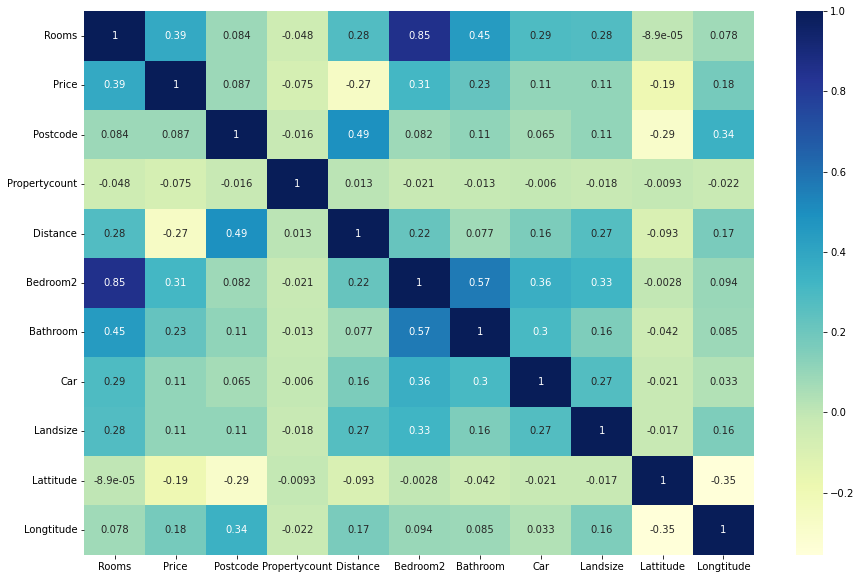

In [65]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (15, 10))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Bedroom2 and Rooms are corrilated with 85%
### So we can drop either column

In [66]:
data = data.drop(['Bedroom2'],axis=1)

### univariate

Text(0, 0.5, 'Dencity')

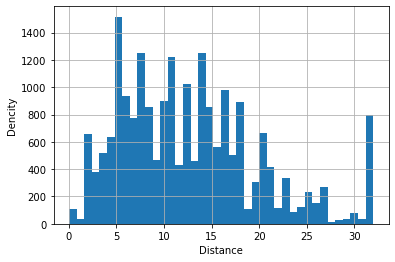

In [67]:
fig = data.Distance.hist(bins=40)
fig.set_xlabel('Distance')
fig.set_ylabel('Dencity')

### Guassion Distribusion

Text(0, 0.5, 'Dencity')

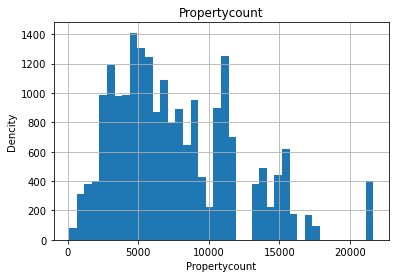

In [68]:
fig = df.Propertycount.hist(bins=40)
fig.set_title('Propertycount')
fig.set_xlabel('Propertycount')
fig.set_ylabel('Dencity')

### Guassion Distribusion

Text(0, 0.5, 'Dencity')

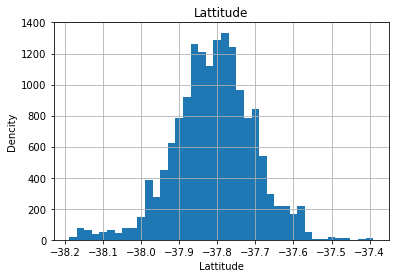

In [69]:
fig = df.Lattitude.hist(bins=40)
fig.set_title('Lattitude')
fig.set_xlabel('Lattitude')
fig.set_ylabel('Dencity')

### Guassion Distribusion

Text(0, 0.5, 'Dencity')

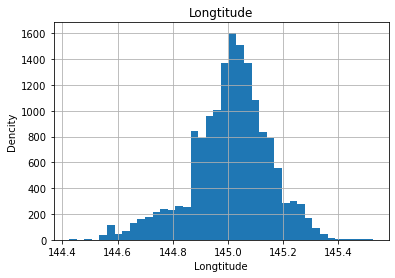

In [70]:
fig = df.Longtitude.hist(bins=40)
fig.set_title('Longtitude')
fig.set_xlabel('Longtitude')
fig.set_ylabel('Dencity')

### Guassion Distribusion

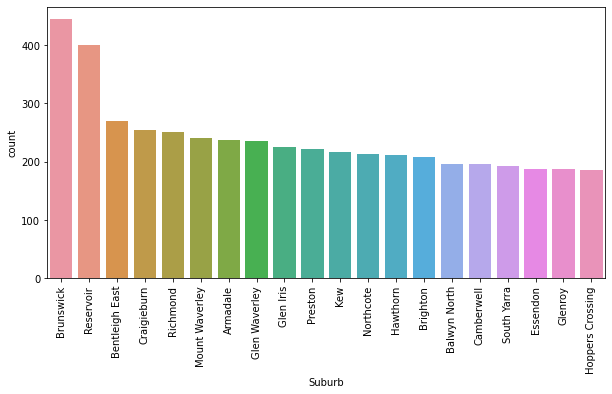

In [71]:
fig, ax = plt.subplots(figsize=(10,5))
ax.tick_params(axis='x', rotation=90)
y_count=sns.countplot(x='Suburb',data=df, ax = ax, order = df['Suburb'].value_counts().iloc[:20].index)

###  Subburb has more Burnswick values

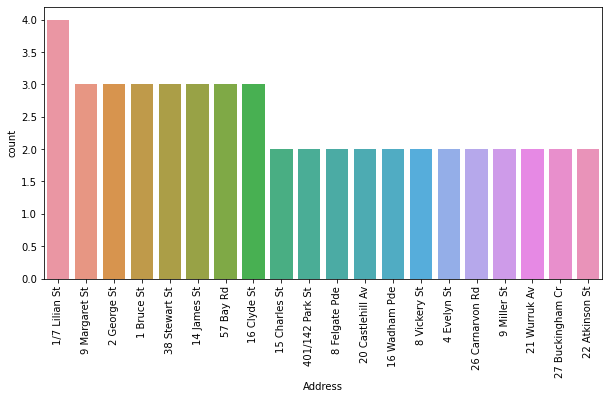

In [72]:
fig, ax = plt.subplots(figsize=(10,5))
ax.tick_params(axis='x', rotation=90)
y_count=sns.countplot(x='Address',data=df, ax = ax, order = df['Address'].value_counts().iloc[:20].index)

### 

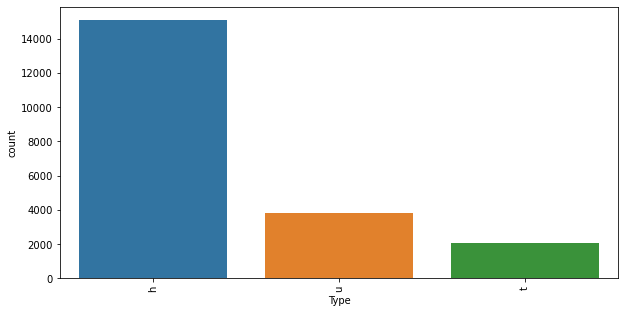

In [73]:
fig, ax = plt.subplots(figsize=(10,5))
ax.tick_params(axis='x', rotation=90)
y_count=sns.countplot(x='Type',data=df, ax = ax, order = df['Type'].value_counts().iloc[:20].index)

### 

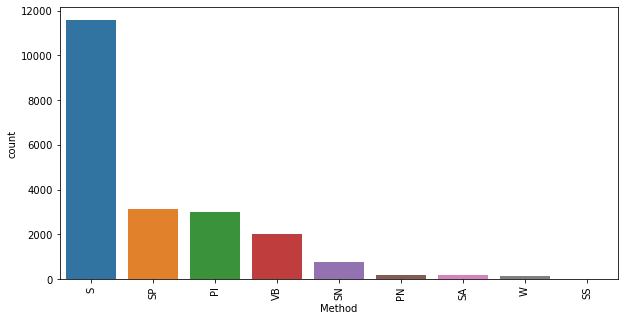

In [74]:
fig, ax = plt.subplots(figsize=(10,5))
ax.tick_params(axis='x', rotation=90)
y_count=sns.countplot(x='Method',data=df, ax = ax, order = df['Method'].value_counts().iloc[:20].index)

### 

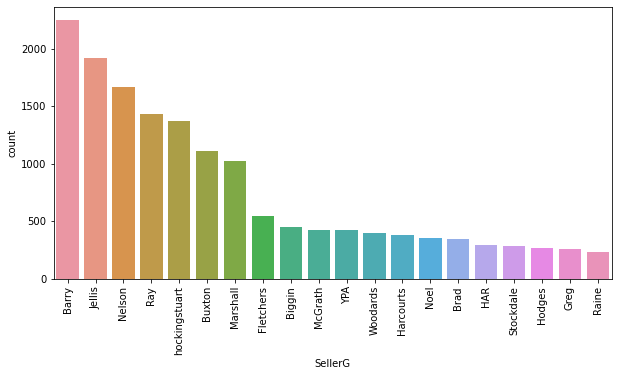

In [75]:
fig, ax = plt.subplots(figsize=(10,5))
ax.tick_params(axis='x', rotation=90)
y_count=sns.countplot(x='SellerG',data=df, ax = ax, order = df['SellerG'].value_counts().iloc[:20].index)

### 

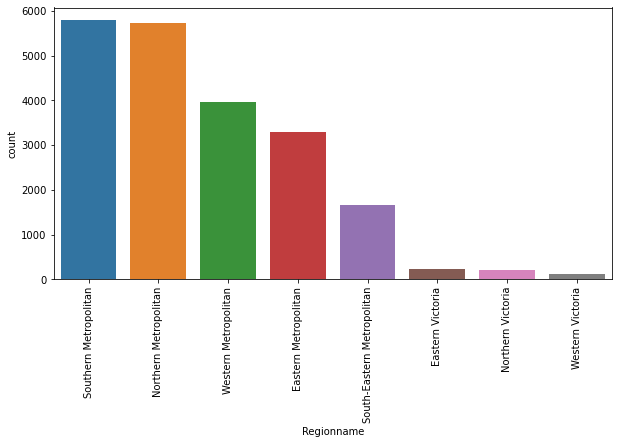

In [76]:
fig, ax = plt.subplots(figsize=(10,5))
ax.tick_params(axis='x', rotation=90)
y_count=sns.countplot(x='Regionname',data=df, ax = ax, order = df['Regionname'].value_counts().iloc[:20].index)

### 

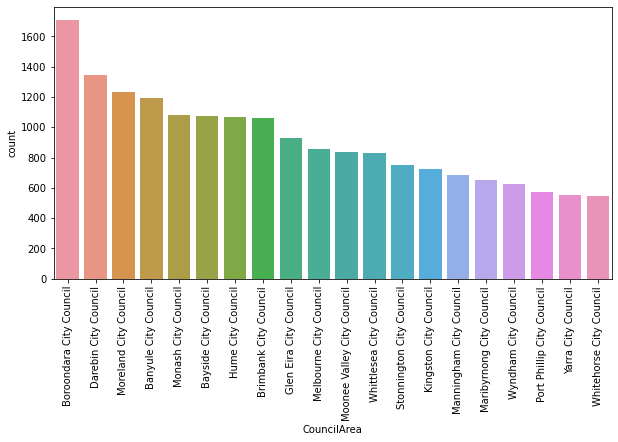

In [77]:
fig, ax = plt.subplots(figsize=(10,5))
ax.tick_params(axis='x', rotation=90)
y_count=sns.countplot(x='CouncilArea',data=df, ax = ax, order = df['CouncilArea'].value_counts().iloc[:20].index)

### 

### Bivariate

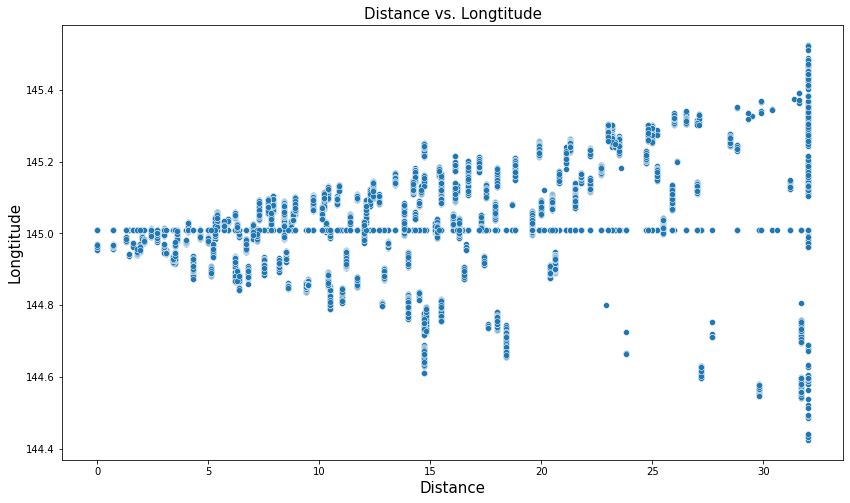

In [78]:
# plotting the target-Fuel type scatter graph
fig, ax = plt.subplots(figsize=(14,8))
sns.scatterplot(data=data, x="Distance", y="Longtitude", ax = ax)
plt.title("Distance vs. Longtitude", size=15)
plt.xlabel("Distance", size=15)
plt.ylabel(("Longtitude"), size=15)
plt.show()

### Distance and Longtitude are corrilated

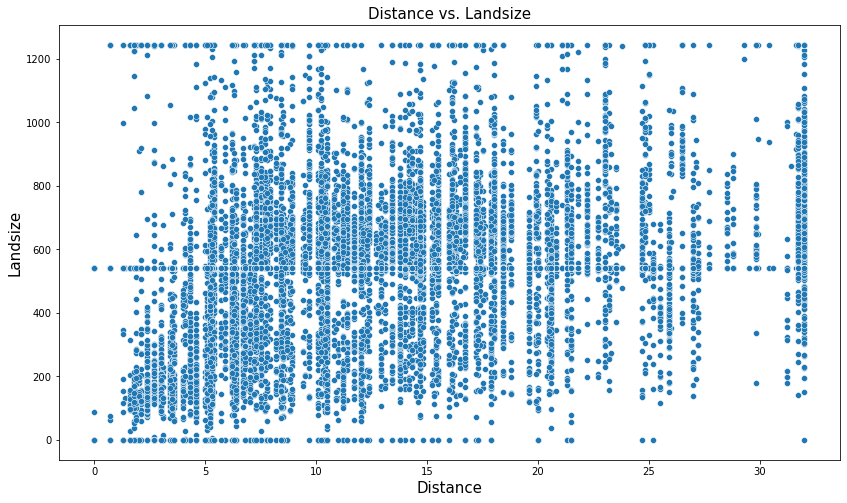

In [79]:
# plotting the target-Fuel type scatter graph
fig, ax = plt.subplots(figsize=(14,8))
sns.scatterplot(data=data, x="Distance", y="Landsize", ax = ax)
plt.title("Distance vs. Landsize", size=15)
plt.xlabel("Distance", size=15)
plt.ylabel(("Landsize"), size=15)
plt.show()

### As Distance increases Landsize Increases

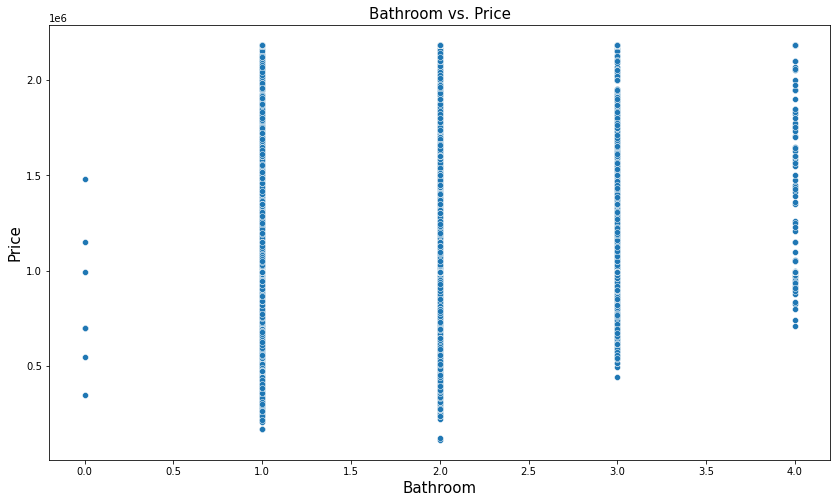

In [80]:
# plotting the target-Fuel type scatter graph
fig, ax = plt.subplots(figsize=(14,8))
sns.scatterplot(data=data, x="Bathroom", y="Price", ax = ax)
plt.title("Bathroom vs. Price", size=15)
plt.xlabel("Bathroom", size=15)
plt.ylabel(("Price"), size=15)
plt.show()

### As Bathroom increases Price Increases

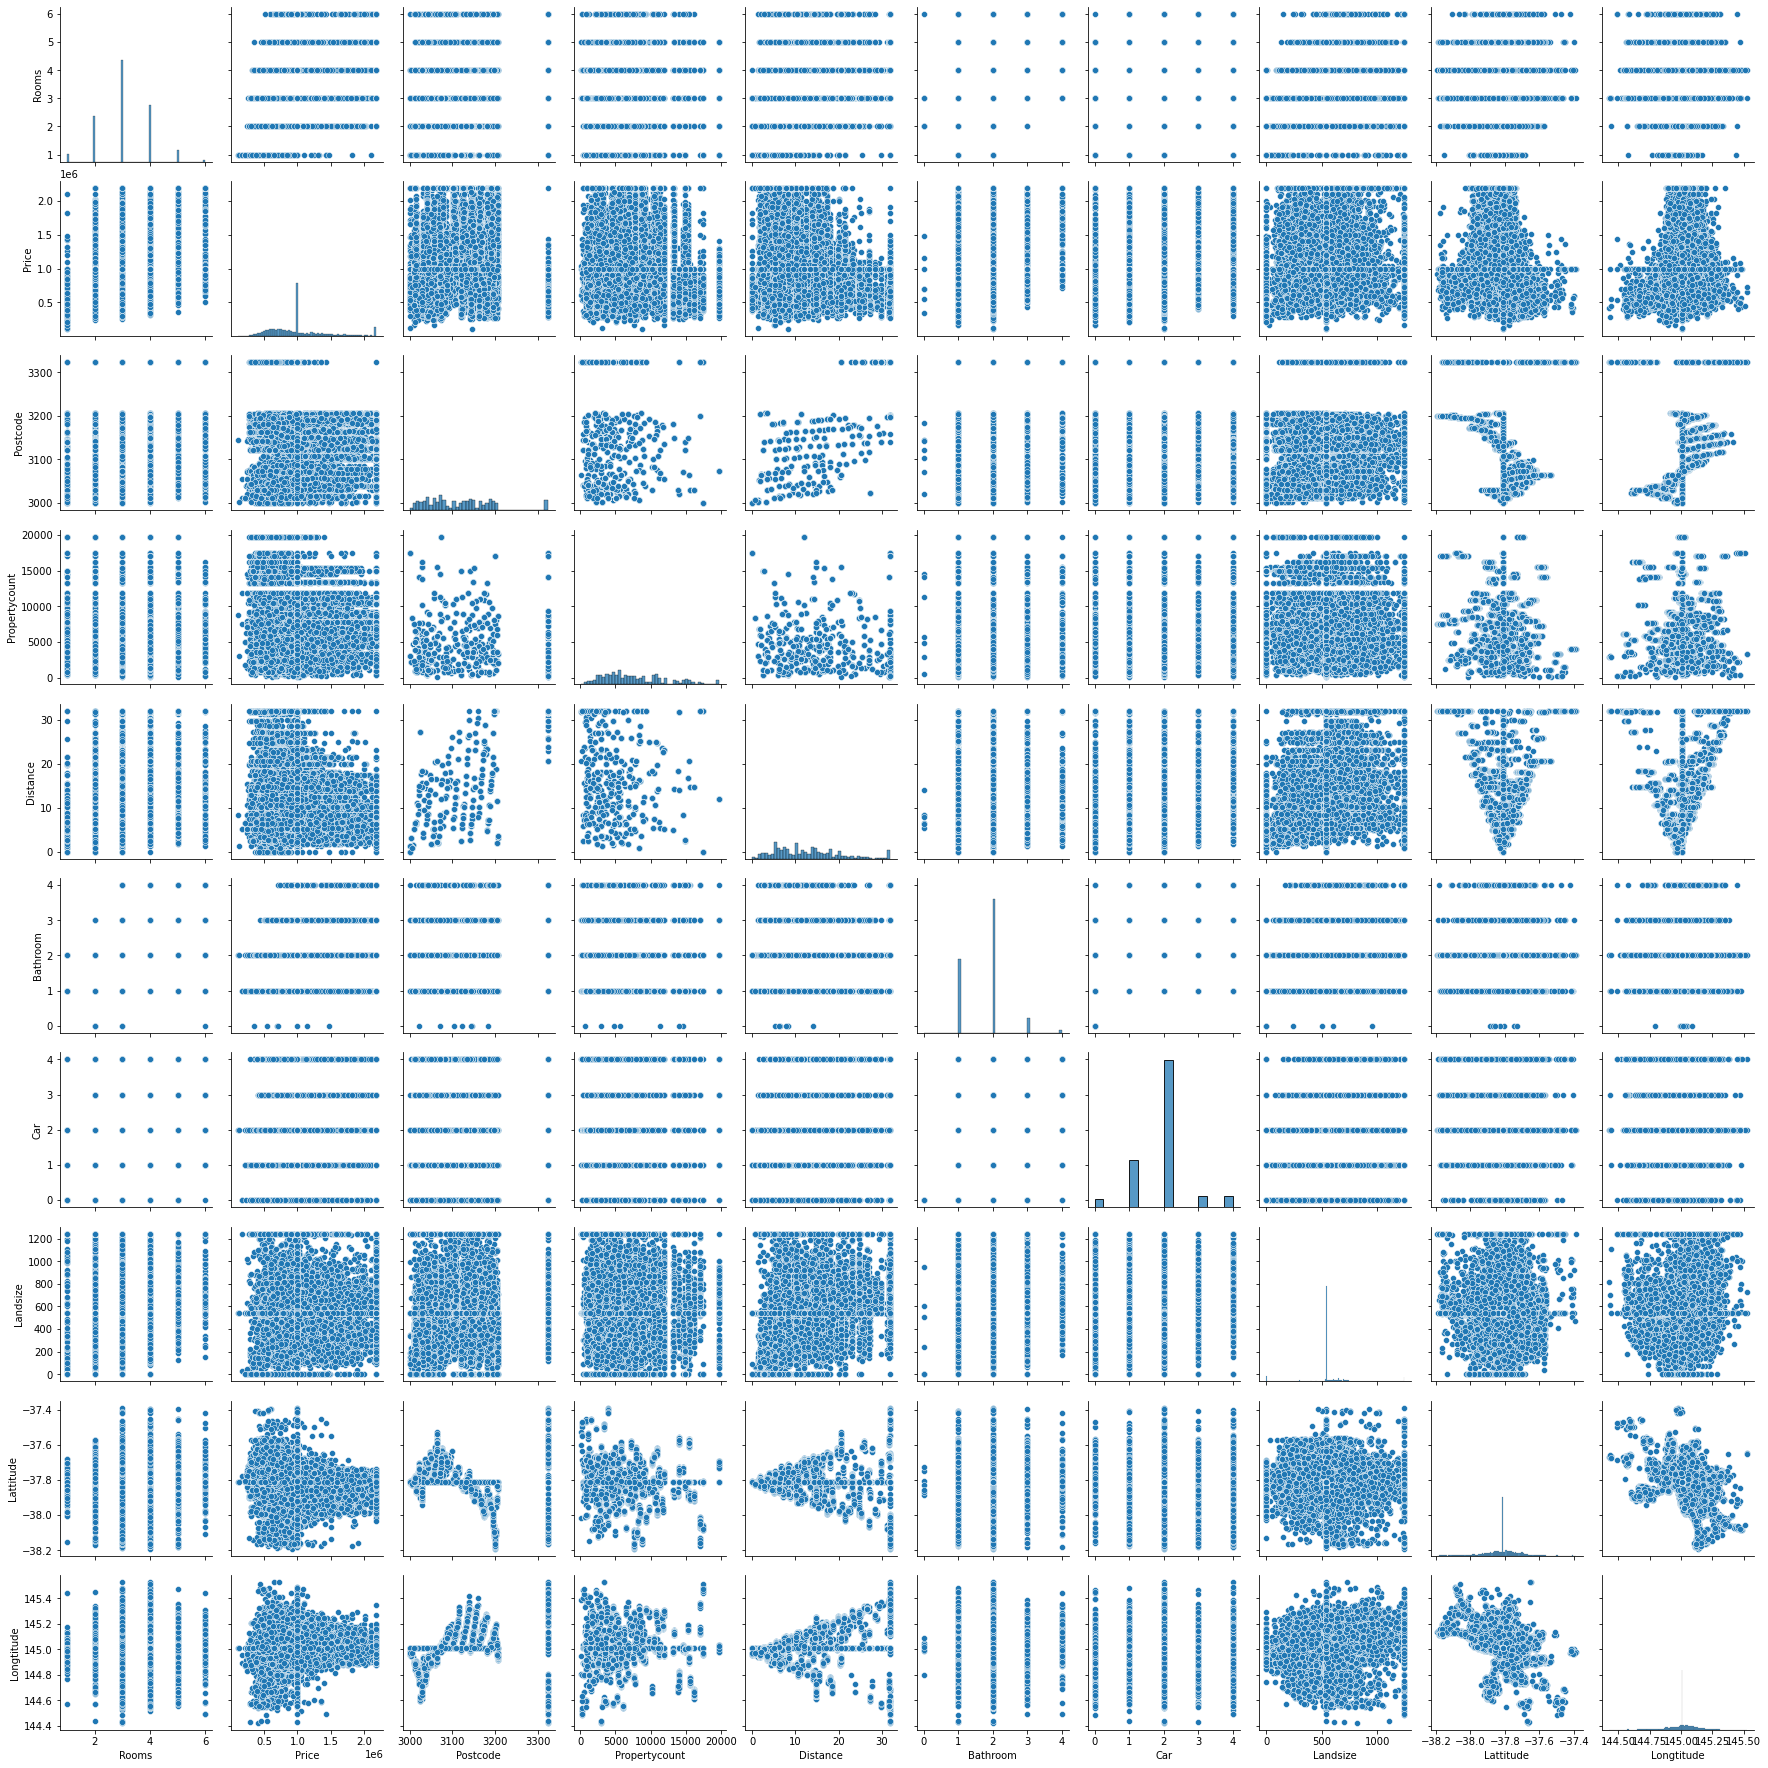

In [81]:
sns.pairplot(data)

## 7. Encoding from categorical features to numerical

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21001 entries, 0 to 21000
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         21001 non-null  object 
 1   Address        21001 non-null  object 
 2   Rooms          21001 non-null  int64  
 3   Type           21001 non-null  object 
 4   Price          21001 non-null  float64
 5   Method         21001 non-null  object 
 6   SellerG        21001 non-null  object 
 7   Date           21001 non-null  object 
 8   Postcode       21001 non-null  int64  
 9   Regionname     21001 non-null  object 
 10  Propertycount  21001 non-null  int64  
 11  Distance       21001 non-null  float64
 12  CouncilArea    21001 non-null  object 
 13  Bathroom       21001 non-null  float64
 14  Car            21001 non-null  float64
 15  Landsize       21001 non-null  float64
 16  Lattitude      21001 non-null  float64
 17  Longtitude     21001 non-null  float64
dtypes: flo

In [83]:
data['Date'].nunique()

75

In [84]:
# Convert the column to datetime
# data['Date'] = pd.to_datetime(data['Date'])
data = data.drop(['Address','Date','SellerG','Suburb'],axis=1)

In [85]:
data.head()

,Rooms,Type,Price,Method,Postcode,Regionname,Propertycount,Distance,CouncilArea,Bathroom,Car,Landsize,Lattitude,Longtitude
0,3,h,1350000.0,S,3067,Northern Metropolitan,4019,3.0,Yarra City Council,2.0,2.0,542.067756,-37.809867,145.009723
1,3,h,858000.0,SP,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,2.0,2.0,542.067756,-37.809867,145.009723
2,2,u,593000.0,S,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,2.0,2.0,542.067756,-37.809867,145.009723
3,3,h,640000.0,S,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,1.0,2.0,219.000000,-37.716550,144.881550
4,3,h,961000.0,S,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,1.0,2.0,717.000000,-37.722740,144.880020


In [86]:
data['CouncilArea'].nunique()

33

In [87]:
data=pd.get_dummies(data,drop_first=True)

In [88]:
# seperating the dependent and independent variables
X = data.drop("Price", axis = 1)
y = data["Price"]

## 8. Splitting the data

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 9. Feature Scaling

In [90]:
##normalising the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [91]:
X_train

,Rooms,Postcode,Propertycount,Distance,Bathroom,Car,Landsize,Lattitude,Longtitude,Type_t,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
19683,3,3168,5837,16.7,1.0,1.0,852.000000,-37.918830,145.112090,0,...,0,0,0,0,0,0,0,0,0,0
19989,5,3101,10331,5.4,2.0,3.0,542.067756,-37.808070,145.054000,0,...,0,0,0,0,0,0,0,0,0,0
3198,2,3122,11308,5.3,2.0,2.0,542.067756,-37.809867,145.009723,0,...,0,0,0,0,0,0,0,0,0,0
16496,3,3064,15510,20.6,2.0,2.0,542.067756,-37.809867,145.009723,0,...,0,0,0,0,0,0,0,0,0,0
16486,4,3058,11204,6.7,2.0,2.0,441.000000,-37.735720,144.972560,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,4,3323,14092,31.7,2.0,2.0,656.000000,-37.586570,144.718340,0,...,0,0,0,0,0,0,0,0,0,0
11964,3,3011,2417,5.1,1.0,0.0,194.000000,-37.804100,144.891600,0,...,0,0,0,0,0,0,0,0,0,0
5390,3,3165,10969,13.8,2.0,2.0,542.067756,-37.932220,145.054220,0,...,0,0,0,0,0,0,0,0,0,0
860,4,3111,4790,16.1,2.0,2.0,542.067756,-37.809867,145.009723,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test) 

## 10. Model building

In [93]:
from sklearn.linear_model import Lasso
sk_model = Lasso(alpha=10)

In [94]:
sk_model.fit(X_train, y_train)

Lasso(alpha=10)

In [95]:
sk_model.score(X_train, y_train)*100

53.91386517710791

In [96]:
y_pred = sk_model.predict(X_test)

In [104]:
from sklearn import metrics
print('Lasso')
print('r2_score', "{:.2f}".format(metrics.r2_score(y_test,y_pred)*100))
score = metrics.r2_score(y_test,y_pred)
a_r2 = 1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted_r2_score',"{:.2f}".format(a_r2*100))
print('MAE:', "{:.2f}".format(metrics.mean_absolute_error(y_test, y_pred)))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', "{:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Lasso
r2_score 53.23
Adjusted_r2_score 52.79
MAE: 220752.72
MSE: 83454399323.99054
RMSE: 288884.75


# Without sklearn

In [98]:
import numpy as np

class LassoRegression:
    def __init__(self, alpha, max_iter=1000, tol=1e-4):
        self.alpha = alpha
        self.max_iter = max_iter
        self.tol = tol
        self.coef_ = None
        self.intercept_ = None
    
    def fit(self, X, y):
        m, n = X.shape
        theta = np.zeros(n)
        self.intercept_ = np.mean(y)
        X_centered = X - np.mean(X, axis=0)
        for iteration in range(self.max_iter):
            old_theta = theta.copy()
            for j in range(n):
                X_j = X_centered[:, j]
                y_pred = X_centered.dot(theta) + self.intercept_
                r = y - y_pred + theta[j] * X_j
                z = X_j.dot(X_j)
                if z == 0:
                    theta[j] = 0
                else:
                    theta[j] = np.sign(np.sum(X_j*r)) * max(0, np.abs(np.sum(X_j*r)) - self.alpha) / z
            self.intercept_ = np.mean(y - X_centered.dot(theta))
            if np.sum(np.abs(theta - old_theta)) < self.tol:
                break
        self.coef_ = theta
    
    def predict(self, X):
        return X.dot(self.coef_) + self.intercept_

In [99]:
# Fit the Lasso regression model
lasso = LassoRegression(alpha=1)
lasso.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lasso.predict(X_test)

In [100]:
import numpy as np

def r2_score(y_test, y_pred):
    sse = np.sum((y_test - y_pred) ** 2)
    sst = np.sum((y_test - np.mean(y_test)) ** 2)
    r2 = 1 - sse / sst
    return r2


In [101]:
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2*100)

R-squared: 53.22502756856973


In [102]:
import numpy as np

def mean_absolute_error(y_test, y_pred):
    mae = np.mean(np.abs(y_test - y_pred))
    return mae


In [103]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error:", mae)

Mean absolute error: 220752.716526889
